# Dimensionality Reduction 

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of variables under consideration, via obtaining a set of principal variables.

## Principal component analysis (PCA)

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns n components in its fit method, and can be used on new data to project it on these components. It's easiest to visualize by looking at a two-dimensional dataset:

![](http://weigend.com/files/teaching/stanford/2008/stanford2008.wikispaces.com/file/view/pca_example.gif)

### Reducing the iris dataset from 4 to 2 dimensions

In [56]:
%matplotlib inline
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import datasets
sns.set(style="whitegrid")

In [57]:
iris = datasets.load_iris()
iris_df = DataFrame(iris.data, columns=iris.feature_names)
iris_df.rename(columns=lambda x: x[:-5], inplace=True)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
from sklearn.decomposition import PCA

In [59]:
X = iris_df.ix[:,0:4].values
pca = PCA(n_components=2)
pca.fit(X)
print pca.explained_variance_ratio_
print pca.components_

[ 0.92461621  0.05301557]
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


In [61]:
X_2dim = pca.transform(X)
print X_2dim.shape
X_2dim[0:5,:]

(150L, 2L)


array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

In [62]:
iris_df['PCA_dim1'] = X_2dim[:,0]
iris_df['PCA_dim2'] = X_2dim[:,1]

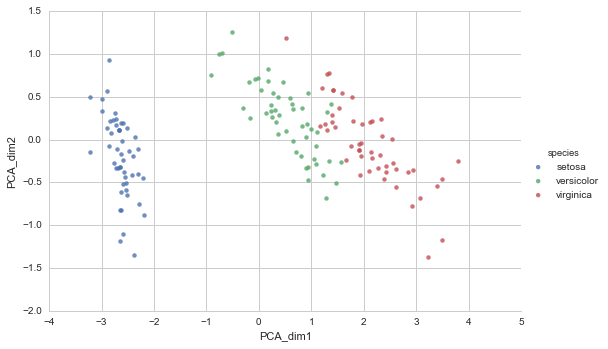

In [63]:
sns.lmplot(x='PCA_dim1',y='PCA_dim2', hue='species', data=iris_df, fit_reg=False, aspect=1.5);

### Reducing Petals and Sepals to one variable each

In [64]:
#Petals
petal_vars = ['petal length','petal width']
X_petal = iris_df[petal_vars].values
pca1 = PCA(n_components=1)
pca1.fit(X_petal)
X_petal = pca1.transform(X_petal)

#Sepals
sepal_vars = ['sepal length','sepal width']
X_sepal = iris_df[sepal_vars].values
pca2 = PCA(n_components=1)
pca2.fit(X_sepal)
X_sepal = pca2.transform(X_sepal)

In [65]:
iris_df['Petal'] = X_petal.flat
iris_df['Sepal'] = X_sepal.flat

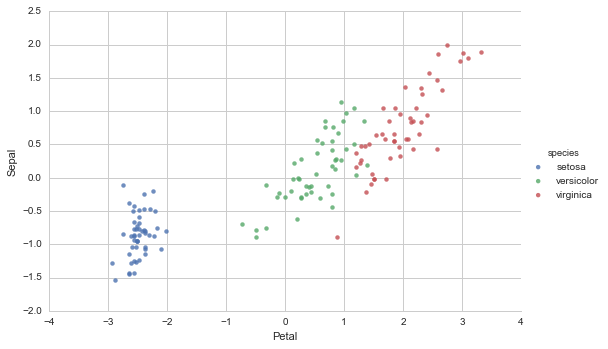

In [55]:
sns.lmplot(x='Petal', y='Sepal', hue='species', data=iris_df, fit_reg=False, aspect=1.5);

** Other Dimensionality Reducting Routines **:

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are Other dimensionality reduction techniques which are useful to know about:

- sklearn.decomposition.PCA: Principal Component Analysis
- sklearn.decomposition.RandomizedPCA: extremely fast approximate PCA implementation based on a randomized algorithm
- sklearn.decomposition.SparsePCA: PCA variant including L1 penalty for sparsity
- sklearn.decomposition.FastICA: Independent Component Analysis
- sklearn.decomposition.NMF: non-negative matrix factorization
- sklearn.manifold.LocallyLinearEmbedding: nonlinear manifold learning technique based on local neighborhood geometry
- sklearn.manifold.IsoMap: nonlinear manifold learning technique based on a sparse graph algorithm

Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the scikit-learn website.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()